In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan
from hdbscan.validity import validity_index

In [2]:
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [3]:
embedding_size = 20
embeddings = pd.read_csv('word2vec_preprocessed_embeddings/embedding_%d.csv' % embedding_size, sep='\t', header=None, dtype=float)
labels = pd.read_csv('word2vec_preprocessed_embeddings/labels_%d.csv' % embedding_size, sep='\t', header=None, dtype=str, names=['action_label'])

In [4]:
print(len(embeddings))

211


In [17]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=1)

In [18]:
clusterer.fit(embeddings)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=3, min_samples=1, p=None,
    prediction_data=False)

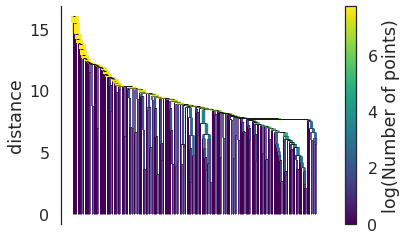

In [7]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.show()

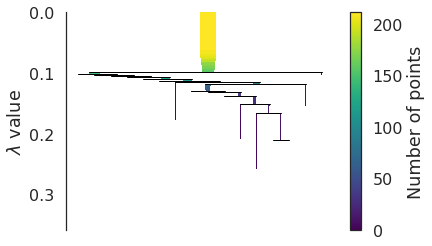

In [7]:
clusterer.condensed_tree_.plot()
plt.show()

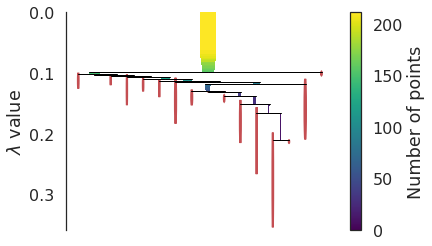

In [8]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [19]:
def plot_clusters(df,path):
    plt.subplots()
    p = None
    palette = sns.color_palette(n_colors=25)
    del palette[7]
    del palette[16]
    cluster_colors = [sns.desaturate(palette[col], sat)
                      if col >= 0 else (0.7, 0.7, 0.7) for col, sat in
                      zip(clusterer.labels_, clusterer.probabilities_)]
    #color_set = set([sns.desaturate(palette[col], 1) if col >= 0 else (0.5, 0.5, 0.5) for col in clusterer.labels_])
    df['color'] = cluster_colors
    df['label'] = clusterer.labels_
    for i, group in df.groupby('label'):
        plt.scatter(group['x'], group['y'], c=group['color'], label='cluster %d' % i, **plot_kwds)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(path, bbox_inches='tight')
    plt.show()

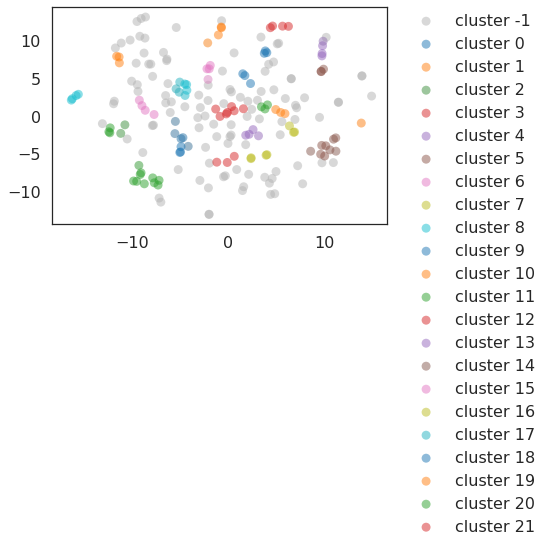

In [20]:
from sklearn.manifold import TSNE

tsne_data = TSNE(n_components=2, random_state=4).fit_transform(embeddings)
tsne_data = pd.DataFrame(data = tsne_data, columns = ['x', 'y'])
plot_clusters(tsne_data,"hdbscan_models/embeddings_tsne_hdbscan_cluster_plot.pdf")

In [21]:
labels['cluster_labels'] = clusterer.labels_
labels['cluster_prob'] = clusterer.probabilities_

In [22]:

labels = labels.sort_values(by=['cluster_labels','cluster_prob'], ascending=False)
labels

,action_label,cluster_labels,cluster_prob
0,load_homepage,21,1.000000
119,order_invoice_copy,21,1.000000
143,click_on_homepage,21,1.000000
179,click_on_cloud_product,21,1.000000
202,click_on_remove,21,1.000000
205,order_overview_check_change_account,21,1.000000
207,click_on_invoice_by_email,21,1.000000
75,click_on_list,20,1.000000
114,click_on_navicon,20,1.000000
157,click_on_menu,20,1.000000


In [23]:
noise = labels[labels.cluster_labels == -1]
clustered = labels[labels.cluster_labels != -1]
print('number of noise actions',len(noise))
print('number of clustered actions',len(clustered))
print('total',len(labels))

number of noise actions 108
number of clustered actions 103
total 211


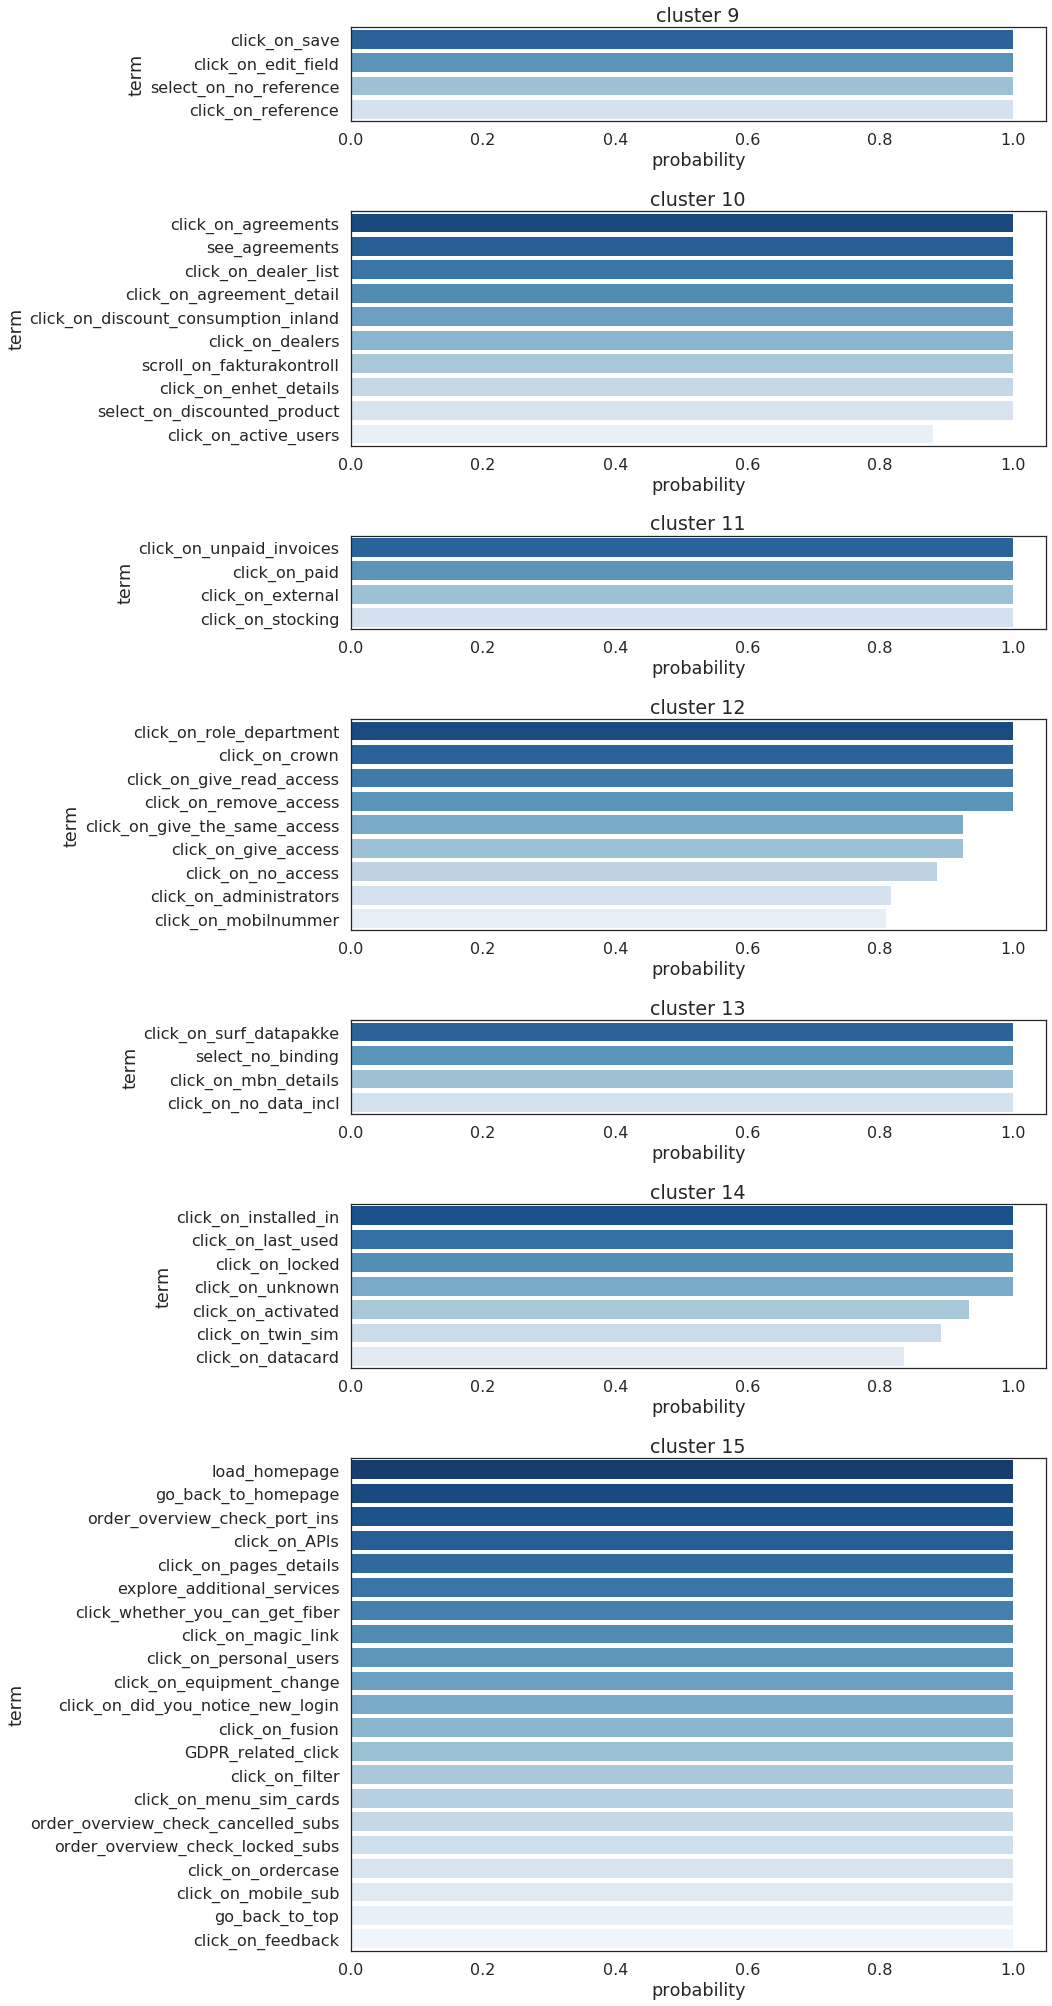

In [27]:
from matplotlib import gridspec

fiz=plt.figure(figsize=(15,50))
num_clusters = len(set(labels.cluster_labels)) - 1

num_rows = labels[labels['cluster_labels'] != -1].groupby('cluster_labels').size().values
gs = gridspec.GridSpec(num_clusters, 1,
                       height_ratios=num_rows.tolist()
                       )
for i, group in labels[labels['cluster_labels'] != -1].groupby('cluster_labels'):
    if i >= 8:
        df=pd.DataFrame(group, columns=['action_label','cluster_prob']).set_index('action_label')
        plt.subplot(gs[i])
        plt.title('cluster '+str(i+1))
        sns.barplot(x='cluster_prob', y=df.index, data=df, palette='Blues_r')
        plt.xlabel('probability')
        plt.ylabel('term')


fiz.tight_layout()
plt.savefig('hdbscan_models/embeddings_hdbscan_cluster_action_prob.pdf', bbox_inches='tight')
plt.show()


In [51]:
validity_index(X=embeddings.values,labels=clusterer.labels_,)

0.07838175130251951

In [19]:
embedding_range = [20,50,100]
min_cluster_size_range = [3,4,5]
min_sample_size_range = range(1,6)

for e in embedding_range:
    embeddings = pd.read_csv('word2vec_preprocessed_embeddings/embedding_%d.csv' % e, sep='\t', header=None, dtype=float)
    for cs in min_cluster_size_range:
        for ss in min_sample_size_range:
            clusterer = hdbscan.HDBSCAN(min_cluster_size=cs, min_samples=ss)
            clusterer.fit(embeddings)
            dbcv = validity_index(X=embeddings.values,labels=clusterer.labels_,)
            print('embedding size =',e,'min cluster size =',cs,'min sample size =',ss,'dbcv =',dbcv)

embedding size = 20 min cluster size = 3 min sample size = 1 dbcv = 0.14250859687726117
embedding size = 20 min cluster size = 3 min sample size = 2 dbcv = 0.12431202439705082
embedding size = 20 min cluster size = 3 min sample size = 3 dbcv = 0.003162080171094043
embedding size = 20 min cluster size = 3 min sample size = 4 dbcv = 0.05363245135492627
embedding size = 20 min cluster size = 3 min sample size = 5 dbcv = 0.052467412814532426
embedding size = 20 min cluster size = 4 min sample size = 1 dbcv = 0.11745617678650293
embedding size = 20 min cluster size = 4 min sample size = 2 dbcv = 0.09240381159493993
embedding size = 20 min cluster size = 4 min sample size = 3 dbcv = 0.003162080171094043
embedding size = 20 min cluster size = 4 min sample size = 4 dbcv = 0.05363245135492627
embedding size = 20 min cluster size = 4 min sample size = 5 dbcv = 0.05864171080240838
embedding size = 20 min cluster size = 5 min sample size = 1 dbcv = 0.06973175074961449
embedding size = 20 min clust